# Gradient Descent #
## 1. Introduction ##
Gradient descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. In machine learning, we use gradient descent to update the parameters of our model. Parameters refer to coefficients in Linear Regression and weights in neural networks.

## 2. Functions

Gradient descent, also known as steepest descent, is an optimization algorithm for finding the local minimum of a function. To find a local minimum, the function "steps" in the direction of the negative of the gradient. Gradient ascent is the same as gradient descent, except that it steps in the direction of the positive of the gradient and therefore finds local maximums instead of minimums. The algorithm of gradient descent can be outlined as follows:

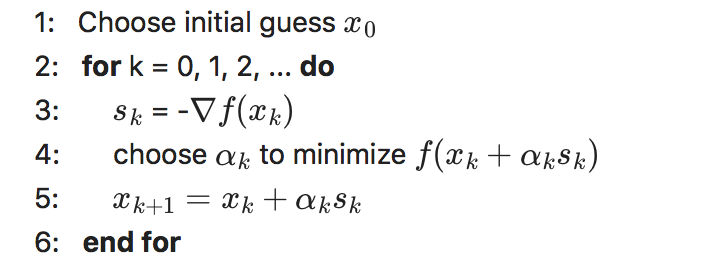



Let's do an example as below 

f(x) = x^3- 2x + 8

In [3]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import random
from scipy import stats
from scipy.optimize import fmin

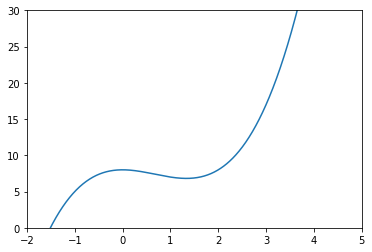

In [6]:
f = lambda x: x**3-2*x**2+8
x = np.linspace(-2,5,1000)
plt.plot(x,f(x))
plt.xlim([-2,5])
plt.ylim([0,30])
plt.show()

In [7]:
x_old = 0
x_new = 2 # The algorithm starts at x=2
n_k = 0.1 # step size
precision = 0.0001

x_list, y_list = [x_new], [f(x_new)]

# returns the value of the derivative of our function
def f_prime(x):
    return 3*x**2-4*x
 
while abs(x_new - x_old) > precision:
    x_old = x_new
    s_k = -f_prime(x_old)
    x_new = x_old + n_k * s_k
    x_list.append(x_new)
    y_list.append(f(x_new))
print("Local minimum occurs at:", x_new)
print("Number of steps:", len(x_list))

Local minimum occurs at: 1.3334253508453249
Number of steps: 17


The figures below show the route that was taken to find the local minimum.


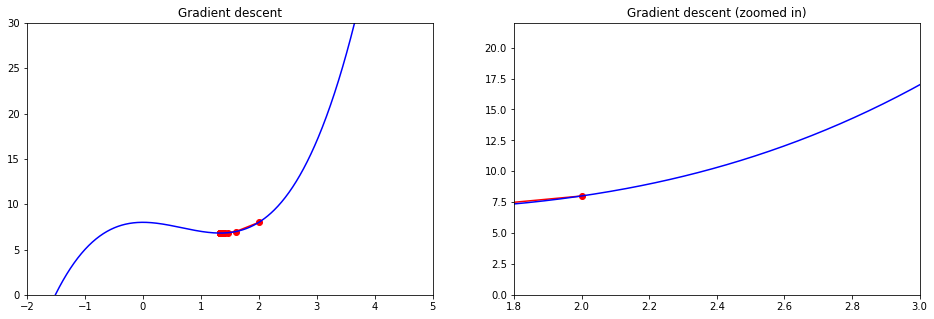

In [10]:
plt.figure(figsize=[16,5])
plt.subplot(1,2,1)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([-2,5])
plt.ylim([0,30])
plt.title("Gradient descent")
plt.subplot(1,2,2)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([1.8,3])
plt.ylim([0,22])
plt.title("Gradient descent (zoomed in)")
plt.show()

We notice thatthe step size (also called learning rate) in the implementation above is constant, unlike the algorithm in the pseudocode. Doing this makes it easier to implement the algorithm. However, it also presents some issues: If the step size is too small, then convergence will be very slow, but if we make it too large, then the method may fail to converge at all.

In [11]:
# we setup this function to pass into the fmin algorithm
def f2(n,x,s):
    x = x + n*s
    return f(x)

x_old = 0
x_new = 2 # The algorithm starts at x=2
precision = 0.0001

x_list, y_list = [x_new], [f(x_new)]

# returns the value of the derivative of our function
def f_prime(x):
    return 3*x**2-4*x

while abs(x_new - x_old) > precision:
    x_old = x_new
    s_k = -f_prime(x_old)
    
    # use scipy fmin function to find ideal step size.
    n_k = fmin(f2,0.1,(x_old,s_k), full_output = False, disp = False)

    x_new = x_old + n_k * s_k
    x_list.append(x_new)
    y_list.append(f(x_new))
    
print("Local minimum occurs at ", float(x_new))
print("Number of steps:", len(x_list))

Local minimum occurs at  1.3333333284505209
Number of steps: 4


Here are some plots of the path taken below. You can see that it converges very quickly to a point near the local minimum, so it's hard to even discern the dots after the first two steps until we zoom in very close in the third frame below:

/opt/anaconda3/lib/python3.8/site-packages/numpy/ma/core.py:2825: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  _data = np.array(data, dtype=dtype, copy=copy,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)
/opt/anaconda3/lib/python3.8/site-packages/numpy/ma/core.py:2825: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different length

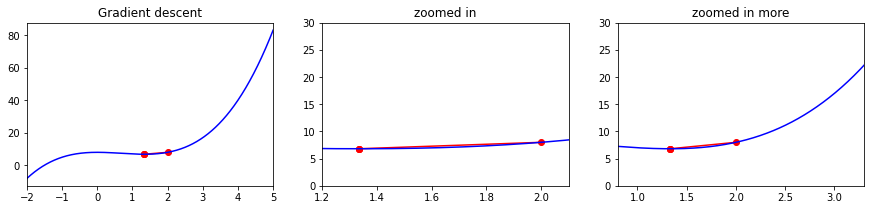

In [14]:
plt.figure(figsize=[15,3])
plt.subplot(1,3,1)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([-2,5])
plt.title("Gradient descent")
plt.subplot(1,3,2)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([1.2,2.1])
plt.ylim([0,30])
plt.title("zoomed in")
plt.subplot(1,3,3)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([0.8,3.3])
plt.ylim([0,30])
plt.title("zoomed in more")
plt.show()


 Update the step size is choosing a decrease constant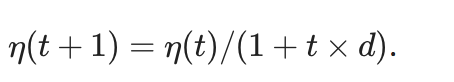

In [15]:
x_old = 0
x_new = 2 # The algorithm starts at x=2
n_k = 0.17 # step size
precision = 0.0001
t, d = 0, 1

x_list, y_list = [x_new], [f(x_new)]

# returns the value of the derivative of our function
def f_prime(x):
    return 3*x**2-4*x
 
while abs(x_new - x_old) > precision:
    x_old = x_new
    s_k = -f_prime(x_old)
    x_new = x_old + n_k * s_k
    x_list.append(x_new)
    y_list.append(f(x_new))
    n_k = n_k / (1 + t * d)
    t += 1

print("Local minimum occurs at:", x_new)
print("Number of steps:", len(x_list))

Local minimum occurs at: 1.3308506740900838
Number of steps: 6


The common approach to finding the best values is to use a function named error function or cost function to measure how fit the line is.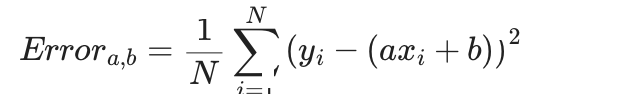

In [17]:
# dataset
x = [12.1, 9.00, 16.2, 9.00, 11.0, 14.0, 3.00, 4.00, 5.00, 2.00, 5.00]
y = [5, 6.5, 9.3, 1.2, 8.33, 12.96, 5.84, 8.26, 10.24, 7.82, 3.8]

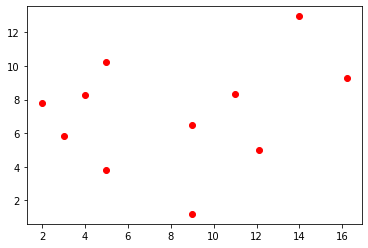

In [18]:
plt.scatter(x, y, color='r')

In [19]:
def Error(a, b):
    # initialize total error
    error = 0.0
    
    # loop within the dataset
    for i in range(len(x)):
        x_i = x[i]
        y_i = y[i]
        
        # compute the error for a single point
        # and add it to the total error
        error += (y_i - (a * x_i + b)) ** 2
    # end of for loop
    
    # compute the mean of the error for all dataset
    error = error / float(len(x))
    return error
# end of def computeError

# compute error for the line corresponded by given a and b values
print("total error:", Error(0.75, 0.57))

total error: 15.882475


In [20]:
# definition of the function to compute the gradient of a.
def gradient_a (a, b):
    # setting default value of gradient
    gradient_a = 0.0
    
    # loop within the dataset
    for i in range(len(x)):
        x_i = x[i]
        y_i = y[i]
        
        # compute the first derivative of the error funtion
        # with respect to a
        gradient_a += -x_i * (y_i - (a * x_i + b))
    # end of for loop
    
    # mean of total error
    gradient_a = 2 * gradient_a / float(len(x))
    return gradient_a
# end of def gradientM


# definition of the function to compute the gradient of b.
def gradient_b (a, b):
    # setting default value of gradient
    gradient_b = 0.0
    
    # loop within the dataset
    for i in range(len(x)):
        x_i = x[i]
        y_i = y[i]
        
        # compute the first derivative of the error funtion
        # with respect to b
        gradient_b += -(y_i - (a * x_i + b))
    # end of for loop
    
    # mean of total error
    gradient_b = 2 * gradient_b / float(len(x))
    return gradient_b
# end of def gradientB

print("gradient_a: ", gradient_a(0.8, 0.2))
print("gradient_b: ", gradient_b(0.8, 0.2))

gradient_a:  18.474545454545453
gradient_b:  -0.874545454545455


In [22]:
def gradientStep(eta, a, b):
    # compute the derivate with respect to m and b
    dA = gradient_a (a, b)
    dB = gradient_b (a, b)
    
    # compute new value of m and b
    a = a - eta * dA
    b = b - eta * dB
    
    return a, b
# end of def gradientStep

# iteration count
N = 250

# learning rate
eta = 0.02

# initial values
a = b = 0

# Let's start iterating
for i in range(N):
    if i % 10 == 0:
        print(i, "\t error:", Error(a, b),"when" ,"a:",a, "b:",b)
    a, b = gradientStep(eta, a, b)
   # end of for loop

0 	 error: 61.39215454545456 when a: 0 b: 0
10 	 error: 5911257243.154952 when a: -8128.953965481413 b: -760.7045782756729
20 	 error: 7.776459008499048e+17 when a: -93244024.21236798 b: -8731600.940715797
30 	 error: 1.023019509700385e+26 when a: -1069478420208.1122 b: -100148614379.46643
40 	 error: 1.345816799244749e+34 when a: -1.2266567143266756e+16 b: -1148671800567029.5
50 	 error: 1.7704675619136914e+42 when a: -1.4069350688806804e+20 b: -1.317488927404737e+19
60 	 error: 2.329110016718223e+50 when a: -1.6137084360499594e+24 b: -1.5111166418268741e+23
70 	 error: 3.0640230788038605e+58 when a: -1.8508707147732987e+28 b: -1.7332012874705856e+27
80 	 error: 4.030826092393427e+66 when a: -2.1228880795783146e+32 b: -1.9879251010418409e+31
90 	 error: 5.302688187799951e+74 when a: -2.4348830863465774e+36 b: -2.2800849710419335e+35
100 	 error: 6.975865833084592e+82 when a: -2.792731138871105e+40 b: -2.6151827714468207e+39
110 	 error: 9.176987670735883e+90 when a: -3.203171132837771

Parameters of the fittest line:
a: -2.18420976835817e+101
b: -2.045348252802137e+100


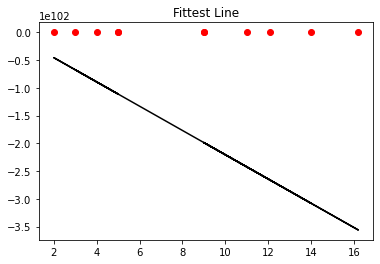

In [23]:
# iteration count
N = 250

# learning rate
eta = 0.02

# initial values
a = b = 0

# lists to keep y-values of line
line = []

# Let's start iterating
for i in range(N):
    a, b = gradientStep(eta, a, b)
# end of for loop

for i in range(len(x)):
    line.append(a * x[i] + b)
# end of for loop

print("Parameters of the fittest line:")
print("a:", a)
print("b:", b)

# drawing of graph.
plt.title("Fittest Line")
plt.scatter (x, y, color= 'r')
plt.plot(x, line, color ='k')
plt.show()

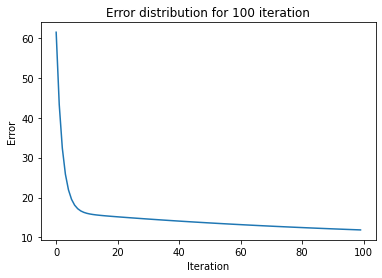

In [24]:
# iteration count
N = 100

# learning rate
eta = 0.01

# initial values
a = b = 0

# lists to keep the error and the iteration values.
errors = []
Ns = []

# Let's start iterating
for i in range(N):
    errors.append(Error(a, b))
    Ns.append(i)
    a, b = gradientStep(eta, a, b)
# end of for loop

# drawing of graph.
plt.title("Error distribution for %s iteration" % N)
plt.ylabel("Error")
plt.xlabel("Iteration")
plt.plot(Ns, errors)
plt.show()